https://archive.ics.uci.edu/dataset/320/student+performance

In [84]:
import pandas as pd
import numpy as np
import zipfile
import requests
import io

In [85]:
# URL of the dataset ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

# Download and extract ZIP file
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as z:
    z.extractall("student_data")  # Extract files into "student_data" folder

# Load dataset (Choose 'student-mat.csv' or 'student-por.csv')
df = pd.read_csv("student_data/student-mat.csv", sep=";")  # Change to student-por.csv if needed

# Display first few rows
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [86]:
df.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())





Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [88]:
# Check for missing values and fill with median (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

In [89]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)



In [90]:
# **Automatically Detect Categorical Columns**
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Detect object-type columns

# **Automatically Detect Numerical Columns** (Exclude categorical columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]  # Ensure we exclude object columns

# **Exclude G1, G2, and G3 from being categorized as categorical**
categorical_cols = [col for col in categorical_cols if col not in ["G1", "G2", "G3"]]
numerical_cols = [col for col in numerical_cols if col not in ["G3"]]  # Exclude target from numerical processing

print(f"Categorical Columns Found: {categorical_cols}")
print(f"Numerical Columns Found: {numerical_cols}")

Categorical Columns Found: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical Columns Found: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [92]:
# **Manual Encoding for Categorical Variables (Label Encoding)**
for col in categorical_cols:
    unique_vals = df[col].unique()  # Get unique values
    mapping = {val: idx for idx, val in enumerate(unique_vals)}  # Create mapping
    df[col] = df[col].map(mapping)  # Apply mapping

In [93]:
# **Automatically Detect Numerical Columns**
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols + ["G3"]]  # Exclude categorical and target

print(f"Numerical Columns Found: {numerical_cols}")

Numerical Columns Found: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [95]:
# **Min-Max Normalization for Numerical Features**
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    if max_val - min_val != 0:  # Prevent division by zero
        df[col] = (df[col] - min_val) / (max_val - min_val)

In [96]:
# Define Features (X) and Target (y)
X = df.drop(columns=["G3"]).values  # Convert DataFrame to NumPy array
y = df["G3"].values


In [ ]:
# Manually split data into 80% training and 20% testing (without sklearn)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Data Preprocessing Completed!")
print(f"Training Data: {len(X_train)} samples, Testing Data: {len(X_test)} samples")

Data Preprocessing Completed!
Training Data: 316 samples, Testing Data: 79 samples


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

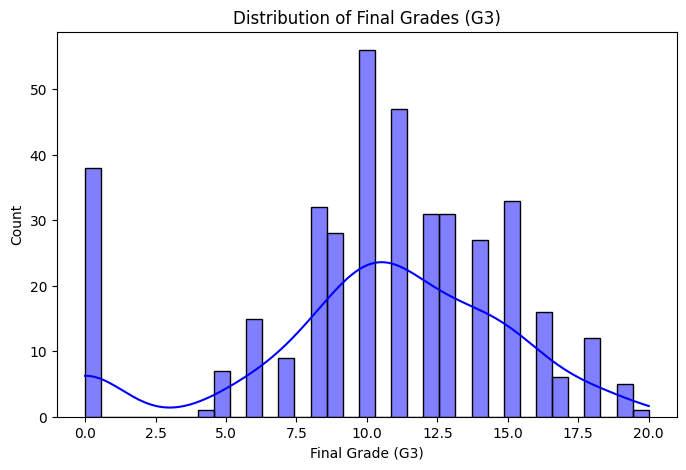

In [99]:
# 🎯 **1. Distribution of the Target Variable (G3 - Final Grade)**
plt.figure(figsize=(8, 5))
sns.histplot(df["G3"], bins=35, kde=True, color="blue")
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.show()

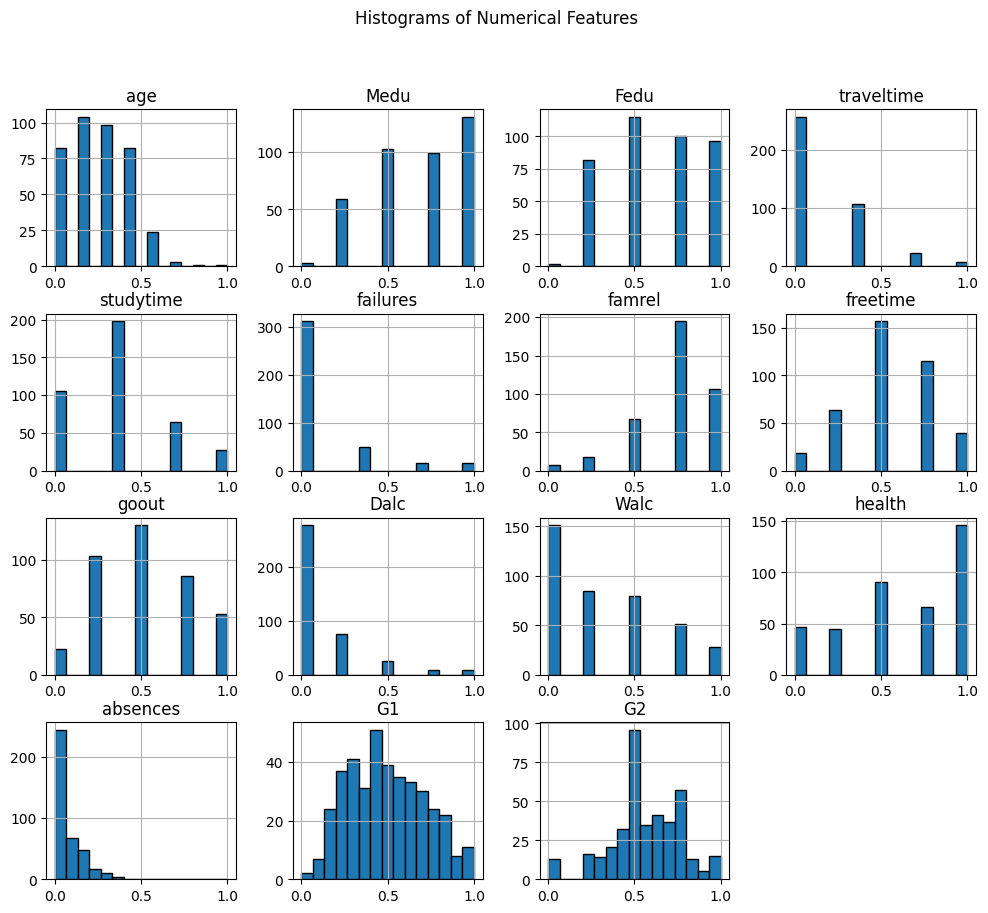

In [100]:
# 📊 **2. Histogram of Numerical Features**
df[numerical_cols].hist(figsize=(12, 10), bins=15, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

<ipython-input-101-65bde9036505>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[idx], palette="Set2")
<ipython-input-101-65bde9036505>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[idx], palette="Set2")
<ipython-input-101-65bde9036505>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[idx], palette="Set2")
<ipython-input-101-65bde9036505>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

IndexError: index 16 is out of bounds for axis 0 with size 16

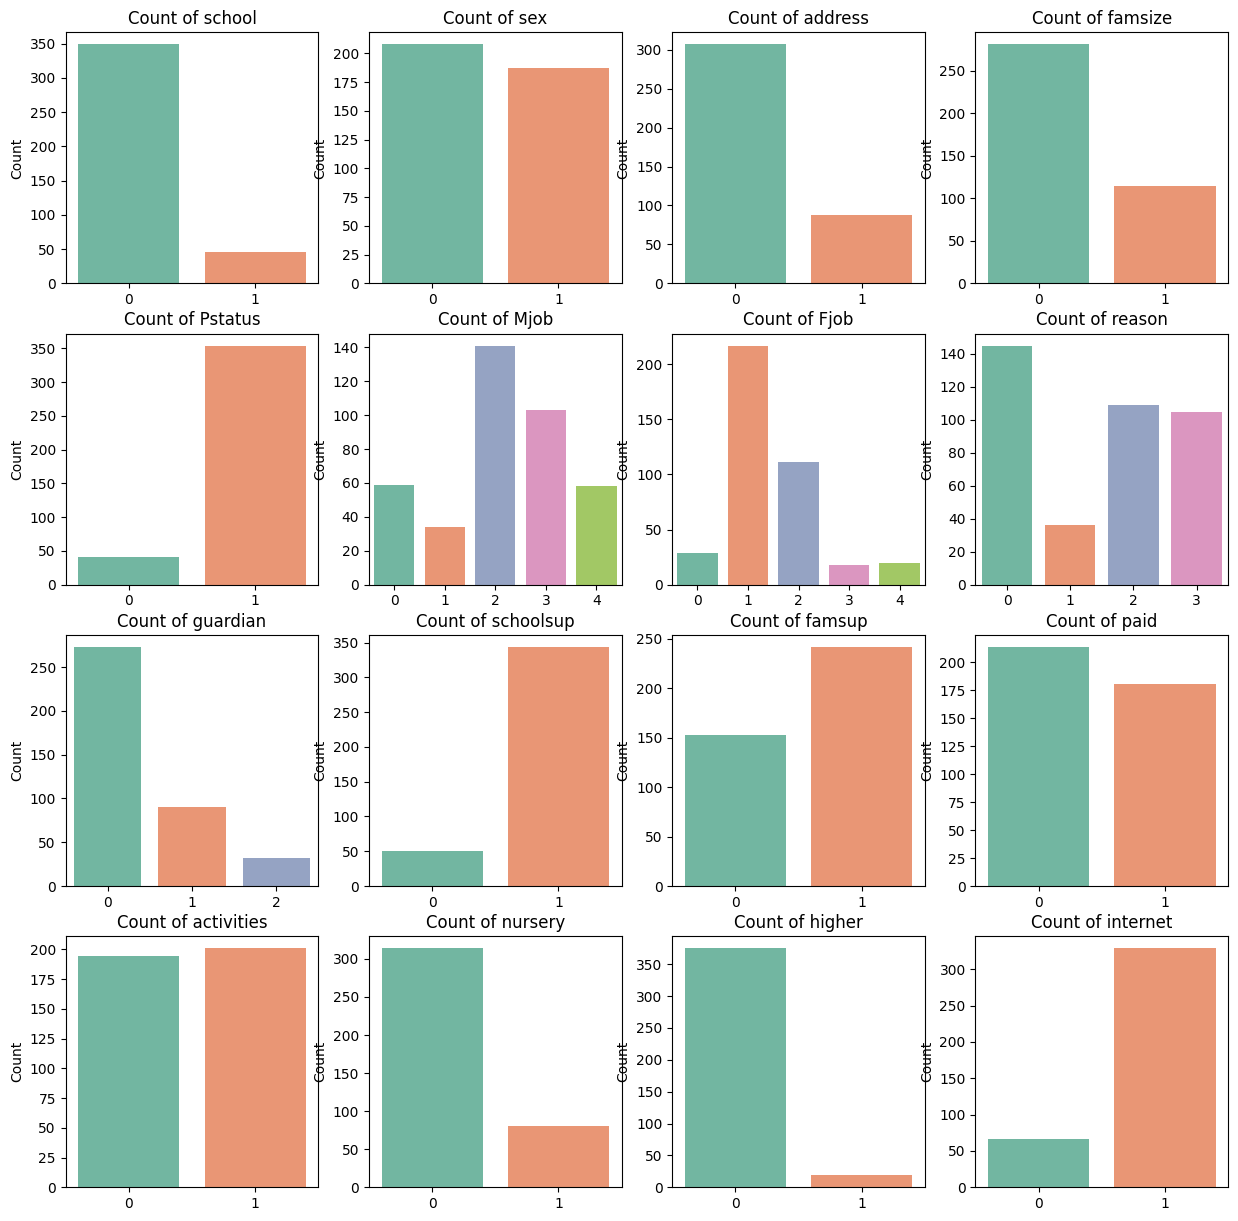

In [101]:
# 📊 **3. Bar Charts for Categorical Features**
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[idx], palette="Set2")
    axes[idx].set_title(f"Count of {col}")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Count")

plt.tight_layout()
plt.show()

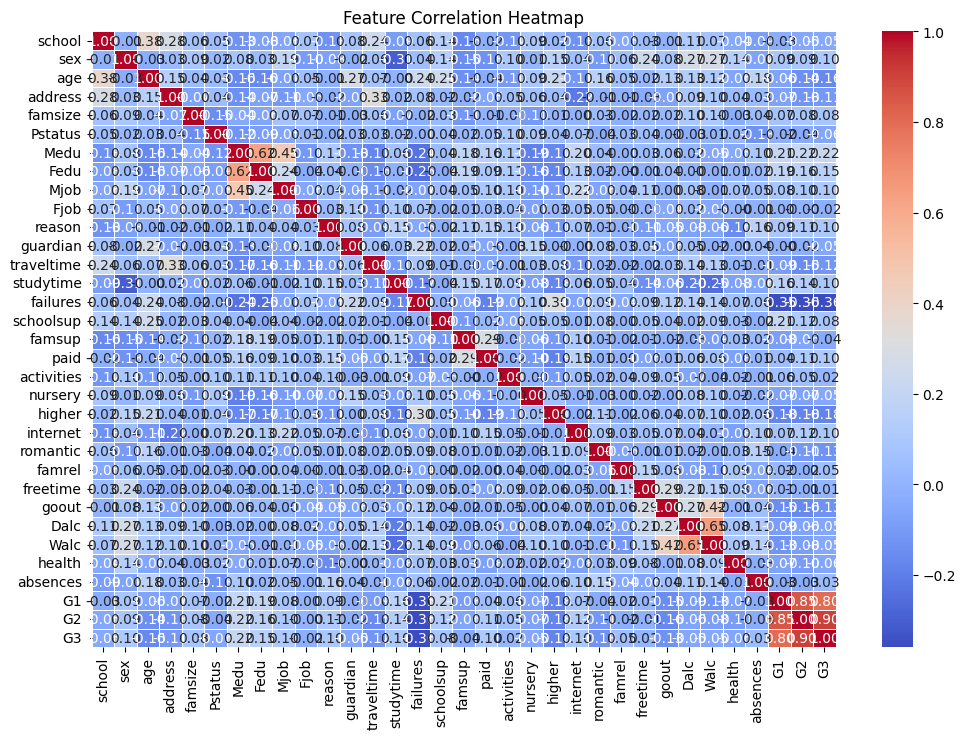

In [102]:
# 🔥 **4. Correlation Heatmap**
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

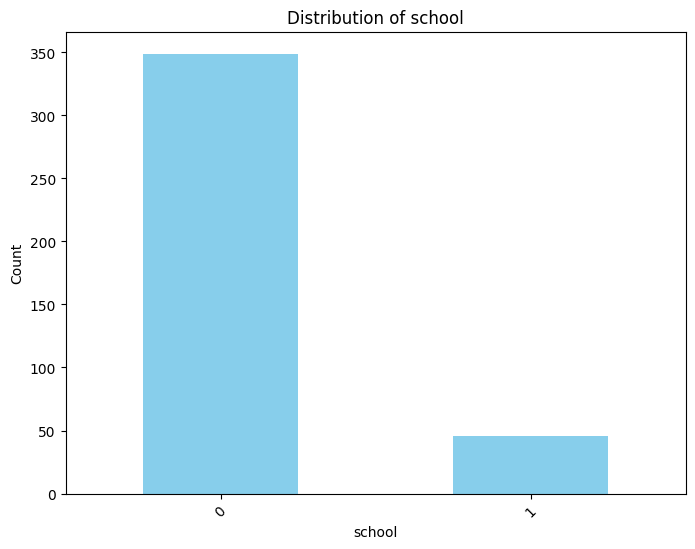

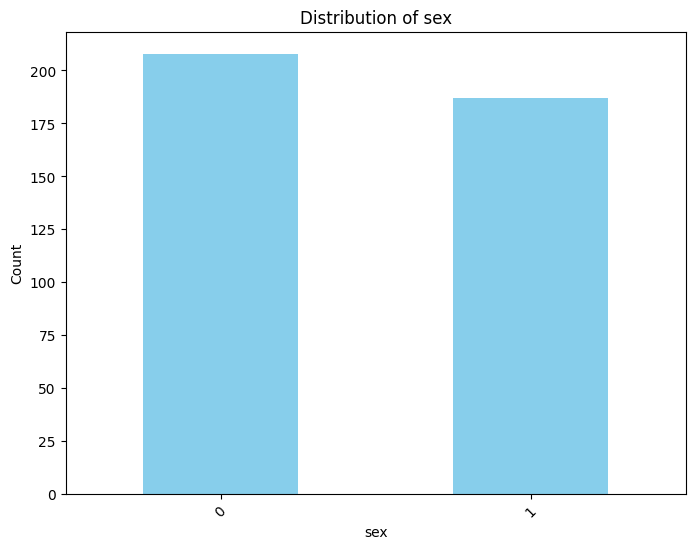

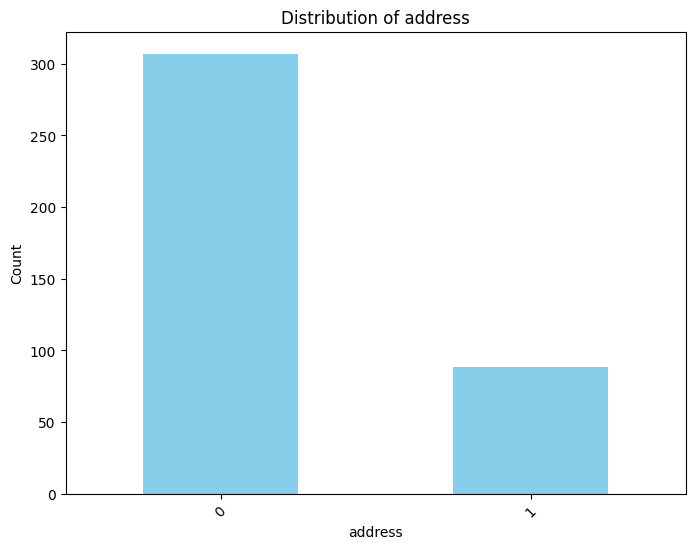

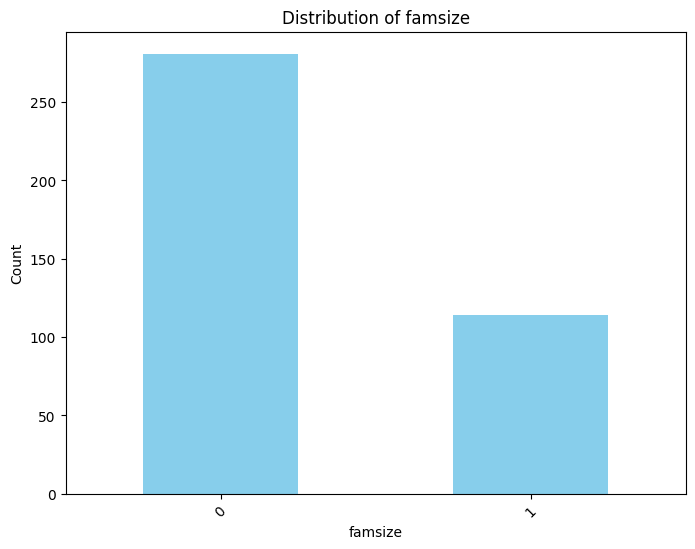

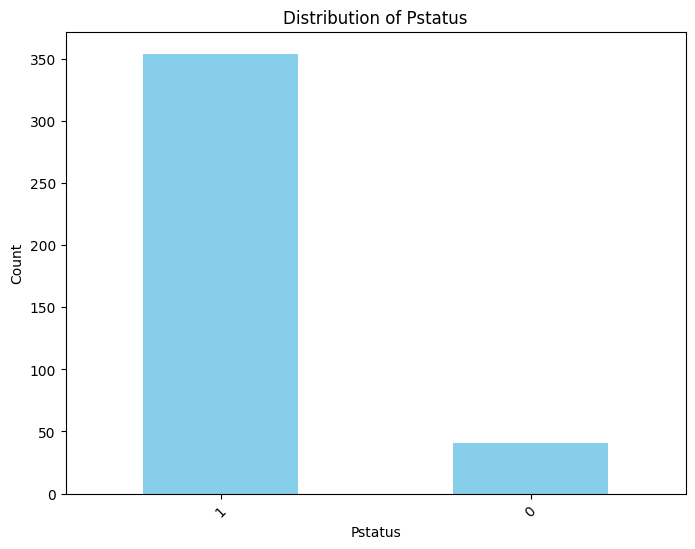

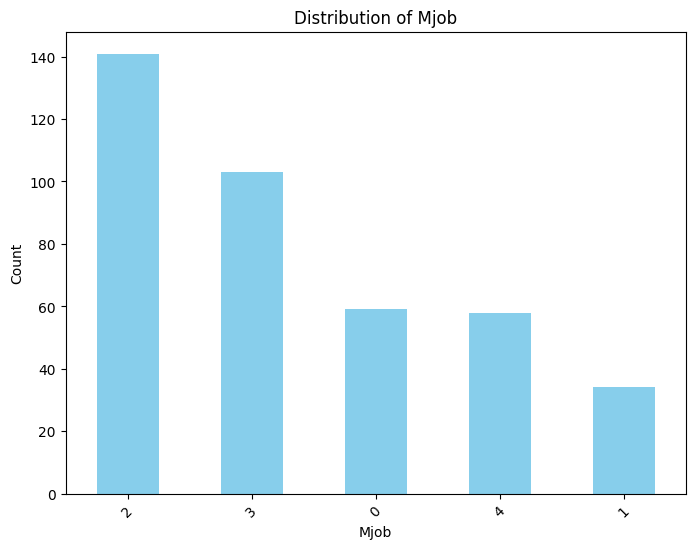

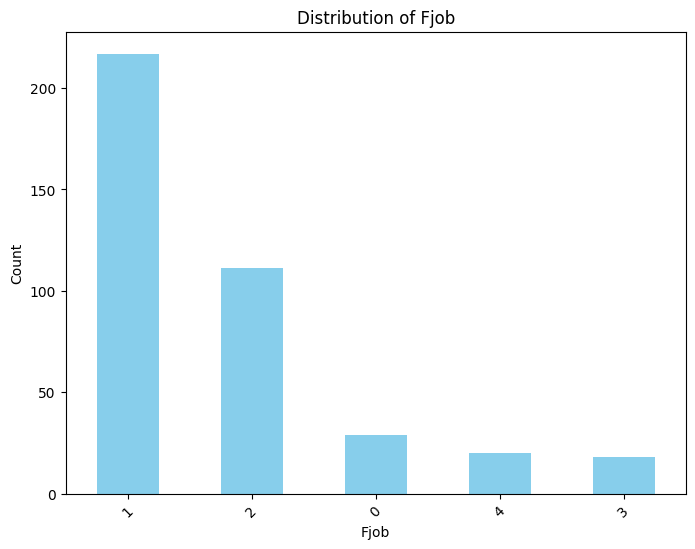

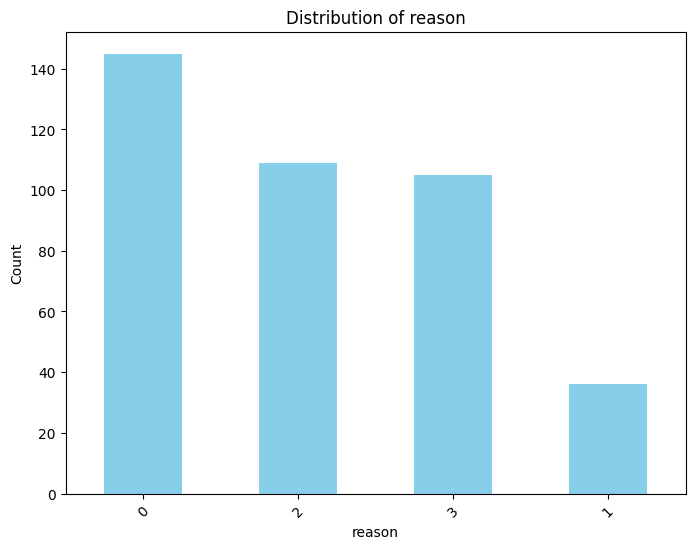

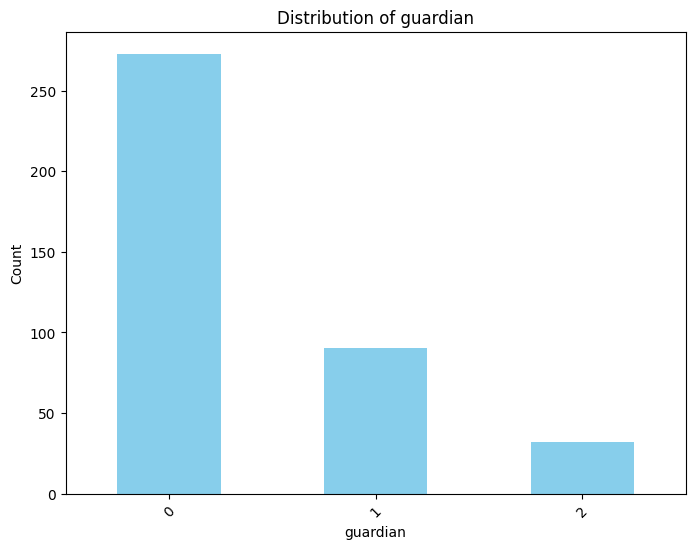

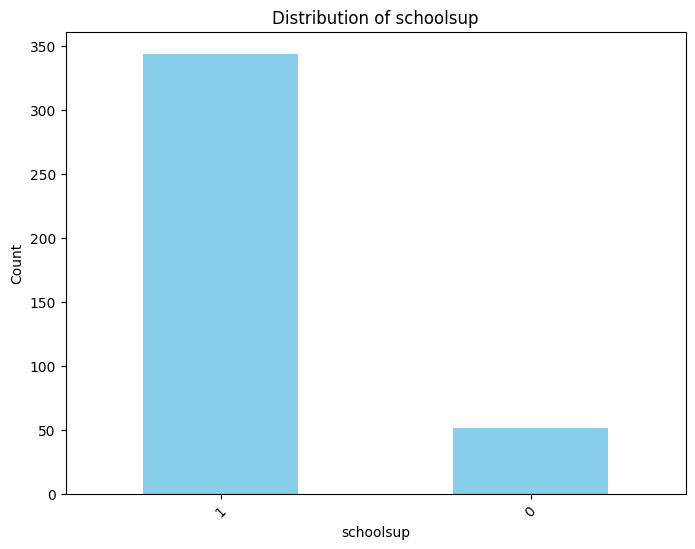

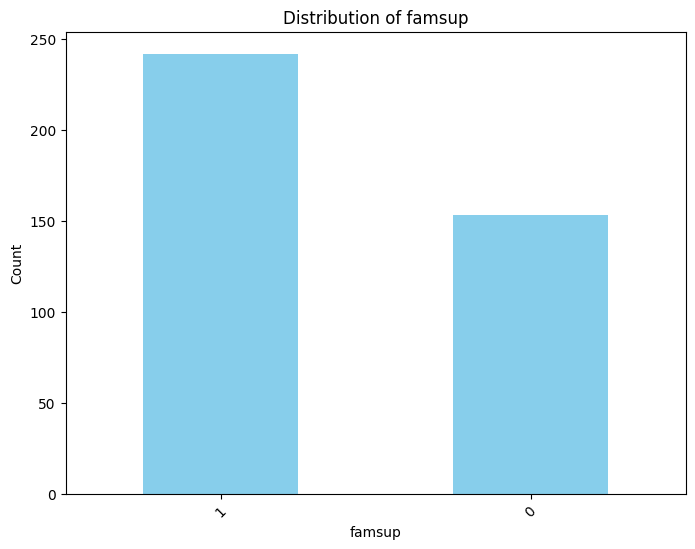

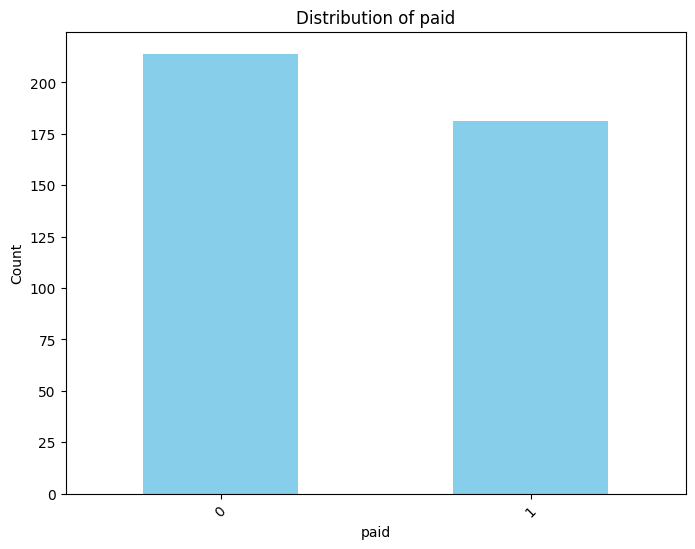

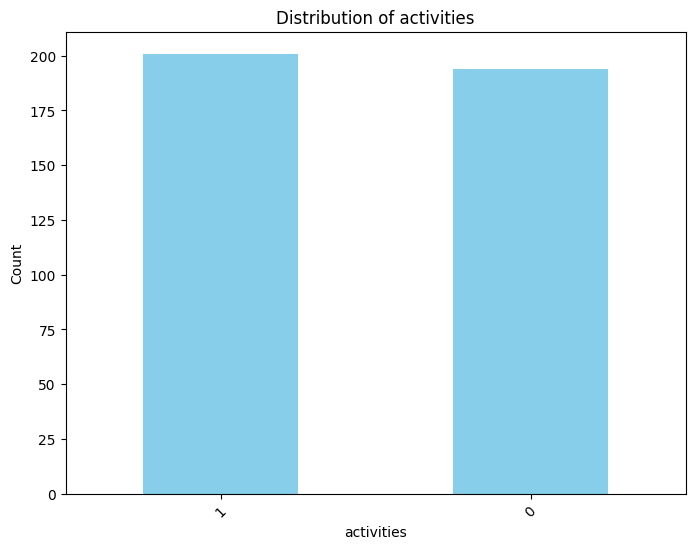

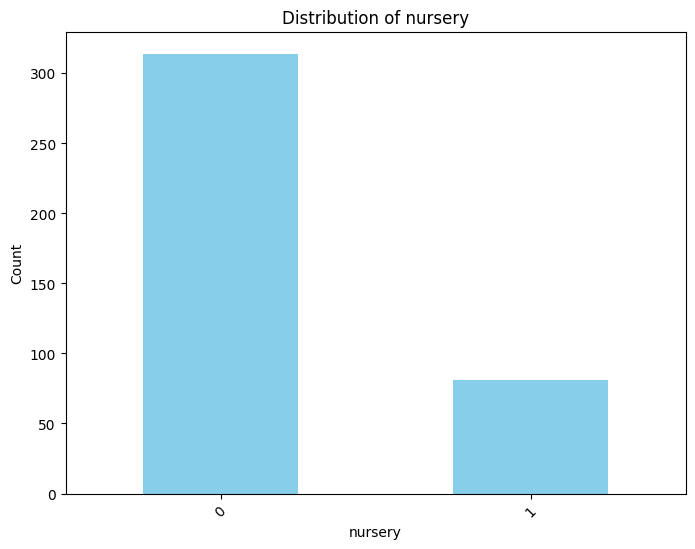

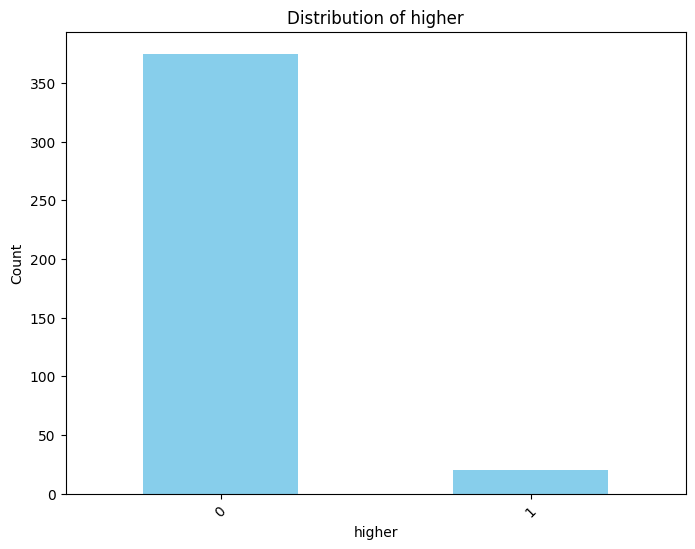

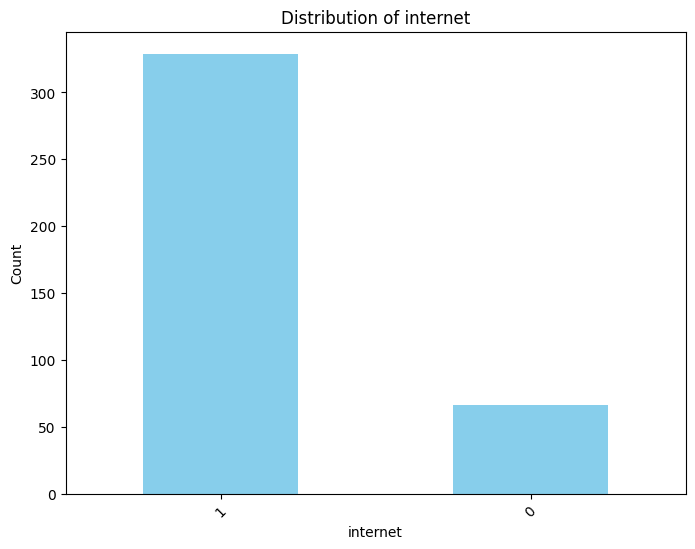

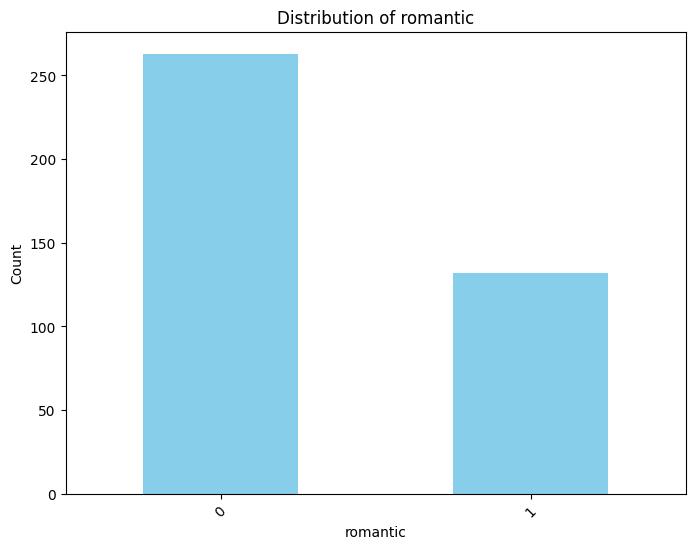

In [103]:
# **1️⃣ Visualize Categorical Features (Bar Plots)**
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# **2️⃣ Visualize Numerical Features (Histograms)**
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df[col].plot(kind='hist', bins=20, color='lightcoral', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

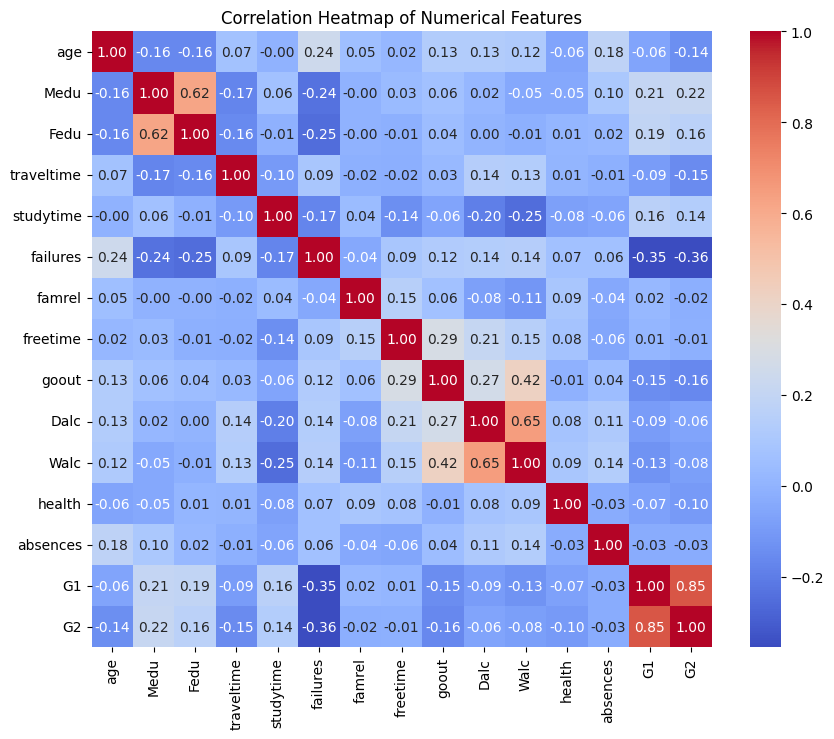

In [104]:
# **3️⃣ Correlation Heatmap (Numerical Features)**
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

https://github.com/Geo-y20/Telco-Customer-Churn-

This project involves analyzing customer behavior data from a telecom company to predict customer churn (i.e., whether a customer will leave the service or not). The goal is to identify key factors that influence churn and build a predictive model to classify customers as likely to churn or not.

Many telecom companies lose revenue due to customer churn. By leveraging data mining techniques, we can analyze patterns in customer behavior and predict which customers are likely to churn. This will help the company take proactive measures (e.g., offering promotions, improving services) to retain customers.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [107]:
# Load the dataset
url = "https://raw.githubusercontent.com/Geo-y20/Telco-Customer-Churn-/main/Telco%20Customer%20Churn.csv"

df = pd.read_csv(url)

# Display first few rows
print(df.head())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [108]:
# Check for missing values
print(df.isnull().sum())



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [109]:
# Convert 'TotalCharges' to numeric (some missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)



In [110]:
# Encode categorical features
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'Churn']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes  # Convert categories to numbers



In [111]:
# Normalize numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())



In [112]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable (1 = Churn, 0 = No Churn)



In [113]:
# Split dataset into train (80%) and test (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Preprocessing Completed!")

✅ Data Preprocessing Completed!


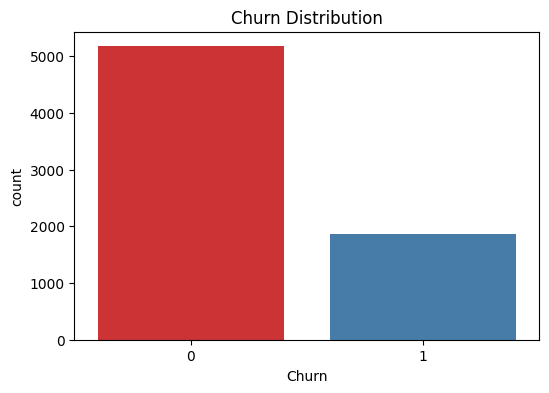

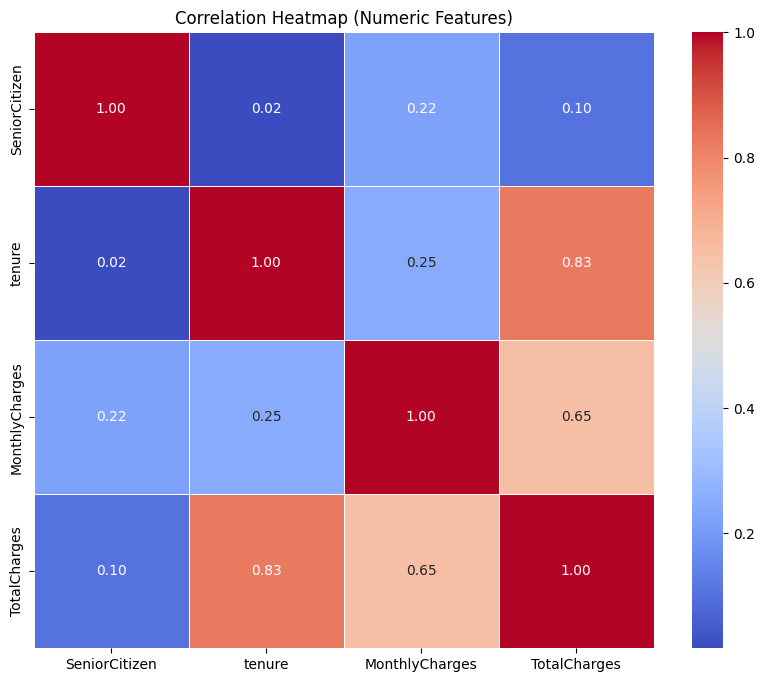

In [114]:
# ✅ Churn Distribution (Fixed countplot)
plt.figure(figsize=(6,4))
sns.countplot(x=df["Churn"], hue=df["Churn"], legend=False, palette="Set1")
plt.title("Churn Distribution")
plt.show()

# ✅ Correlation Heatmap (Fixed)
df_numeric = df.select_dtypes(include=['int64', 'float64'])  # Keep only numeric data
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
